Import pandas, numpy and the dataset

In [1]:
import pandas as pd 
import numpy as np
df=pd.read_csv('english_football_data.csv')


C:\Users\user\AppData\Local\Temp\ipykernel_2640\1724179792.py:3: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('english_football_data.csv')


finding out the column causing the warning of mixed types

In [2]:
sample = pd.read_csv('english_football_data.csv', nrows=5)
print(sample.columns[65])

Time


the time column has mixed datatypes from our combinining of datasets we drop it because we don't need it in our analysis

In [3]:
df.drop(df.columns[65], axis=1, inplace=True)

finding out dataset information using df.head(),df.info() and df.describe()

In [4]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,1XBCH,1XBCD,1XBCA,BFECH,BFECD,BFECA,BFEC>2.5,BFEC<2.5,BFECAHH,BFECAHA
0,E0,13/08/16,Burnley,Swansea,0,1,A,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,13/08/16,Everton,Tottenham,1,1,D,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,13/08/16,Hull,Leicester,2,1,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,13/08/16,Man City,Sunderland,2,1,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13204 entries, 0 to 13203
Columns: 152 entries, Div to BFECAHA
dtypes: float64(143), int64(2), object(7)
memory usage: 15.3+ MB


from df.info you can see we have 13204 rows and 152 columns now let's see for df.describe

In [6]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,1XBCH,1XBCD,1XBCA,BFECH,BFECD,BFECA,BFEC>2.5,BFEC<2.5,BFECAHH,BFECAHA
count,13204.000000,13204.000000,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000,...,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,1.456225,1.184641,0.647883,0.523669,13.201318,11.044763,4.507233,3.779444,11.171779,11.630766,...,2.603659,3.858147,3.910836,2.716853,3.999319,4.314744,2.001408,2.103774,1.990701,1.991557
std,1.241610,1.122364,0.817826,0.731555,5.099086,4.632475,2.455637,2.216398,3.567774,3.676604,...,1.333011,0.912232,2.450213,1.497678,1.008826,3.153721,0.341480,0.449722,0.109335,0.109741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.080000,2.860000,1.220000,1.100000,2.880000,1.210000,1.210000,1.420000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,9.000000,9.000000,...,1.770000,3.390000,2.390000,1.820000,3.500000,2.500000,1.750000,1.810000,1.910000,1.910000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,4.000000,3.000000,11.000000,11.000000,...,2.250000,3.590000,3.270000,2.320000,3.700000,3.450000,1.990000,1.995000,1.990000,1.990000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,14.000000,6.000000,5.000000,13.000000,14.000000,...,2.960000,4.000000,4.590000,3.100000,4.100000,5.000000,2.200000,2.280000,2.070000,2.070000
max,9.000000,9.000000,7.000000,5.000000,37.000000,37.000000,19.000000,16.000000,27.000000,26.000000,...,14.100000,14.700000,28.000000,17.000000,15.000000,32.000000,3.300000,5.500000,2.260000,2.300000


df.describe() does not show the full picture as we have a lot of columns some of which we might not need for our problem statement of modelling the likelihood of a match ending in a win,loss or draw we must remove some columns and change the names of columns to real names.we will define the columns we want to keep and rename them to appropriate names for my project i will analyze using bet365 odds

In [7]:
new_columns = {
    "Div": "Division",
    "Date": "MatchDate",
    "HomeTeam": "HomeTeam",
    "AwayTeam": "AwayTeam",
    "FTHG": "FullTimeHomeGoals",
    "FTAG": "FullTimeAwayGoals",
    "FTR": "FullTimeResult",  
    "HTHG": "HalfTimeHomeGoals",
    "HTAG": "HalfTimeAwayGoals",
    "HTR": "HalfTimeResult", 
    "Referee": "Referee",
    "HS": "HomeShots",
    "AS": "AwayShots",
    "HST": "HomeShotsOnTarget",
    "AST": "AwayShotsOnTarget",
    "HF": "HomeFoulsCommitted",
    "AF": "AwayFoulsCommitted",
    "HC": "HomeCorners",
    "AC": "AwayCorners",
    "HY": "HomeYellowCards",
    "AY": "AwayYellowCards",
    "HR": "HomeRedCards",
    "AR": "AwayRedCards",
    
    # Bookmaker odds (Bet365)
    "B365H": "Bet365_HomeWinOdds",
    "B365D": "Bet365_DrawOdds",
    "B365A": "Bet365_AwayWinOdds",
   
}



after describing the new columns to rename and then keep now we can apply the change to our dataset

In [8]:
#only keep the columns listed
df = df[list(new_columns.keys())]

# Rename the columns to their new column names
df = df.rename(columns=new_columns)

check changes

In [9]:
df.head()

,Division,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,AwayFoulsCommitted,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Bet365_HomeWinOdds,Bet365_DrawOdds,Bet365_AwayWinOdds
0,E0,13/08/16,Burnley,Swansea,0,1,A,0.0,0.0,D,...,14.0,7.0,4.0,3.0,2.0,0.0,0.0,2.40,3.3,3.25
1,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0.0,0.0,D,...,15.0,3.0,6.0,2.0,2.0,0.0,0.0,2.00,3.3,4.50
2,E0,13/08/16,Everton,Tottenham,1,1,D,1.0,0.0,H,...,14.0,5.0,6.0,0.0,0.0,0.0,0.0,3.20,3.4,2.40
3,E0,13/08/16,Hull,Leicester,2,1,H,1.0,0.0,H,...,17.0,5.0,3.0,2.0,2.0,0.0,0.0,4.50,3.6,1.91
4,E0,13/08/16,Man City,Sunderland,2,1,H,1.0,0.0,H,...,14.0,9.0,6.0,1.0,2.0,0.0,0.0,1.25,6.5,15.00


using df.info() to find more information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13204 entries, 0 to 13203
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Division            13204 non-null  object 
 1   MatchDate           13204 non-null  object 
 2   HomeTeam            13204 non-null  object 
 3   AwayTeam            13204 non-null  object 
 4   FullTimeHomeGoals   13204 non-null  int64  
 5   FullTimeAwayGoals   13204 non-null  int64  
 6   FullTimeResult      13204 non-null  object 
 7   HalfTimeHomeGoals   13203 non-null  float64
 8   HalfTimeAwayGoals   13203 non-null  float64
 9   HalfTimeResult      13203 non-null  object 
 10  Referee             13203 non-null  object 
 11  HomeShots           13203 non-null  float64
 12  AwayShots           13203 non-null  float64
 13  HomeShotsOnTarget   13203 non-null  float64
 14  AwayShotsOnTarget   13203 non-null  float64
 15  HomeFoulsCommitted  13203 non-null  float64
 16  Away

From our df.describe you can clearly see that they are some null records so to clean our dataset we remove the null records

In [11]:
df = df.dropna()

# check how many rows are left
print(f"Data shape after dropping nulls: {df.shape}")

Data shape after dropping nulls: (13201, 26)


we now have 13201 records with 26 columns of data lets see how they look to try and find out if they need more cleaning

In [12]:
df.head()

,Division,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,AwayFoulsCommitted,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Bet365_HomeWinOdds,Bet365_DrawOdds,Bet365_AwayWinOdds
0,E0,13/08/16,Burnley,Swansea,0,1,A,0.0,0.0,D,...,14.0,7.0,4.0,3.0,2.0,0.0,0.0,2.40,3.3,3.25
1,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0.0,0.0,D,...,15.0,3.0,6.0,2.0,2.0,0.0,0.0,2.00,3.3,4.50
2,E0,13/08/16,Everton,Tottenham,1,1,D,1.0,0.0,H,...,14.0,5.0,6.0,0.0,0.0,0.0,0.0,3.20,3.4,2.40
3,E0,13/08/16,Hull,Leicester,2,1,H,1.0,0.0,H,...,17.0,5.0,3.0,2.0,2.0,0.0,0.0,4.50,3.6,1.91
4,E0,13/08/16,Man City,Sunderland,2,1,H,1.0,0.0,H,...,14.0,9.0,6.0,1.0,2.0,0.0,0.0,1.25,6.5,15.00


from this result we can see that the name of the division is not understandable so it has to change to meaningful division names 

In [13]:

division = {
    'E0': 'Premier League',
    'E1': 'Championship',
    'E2': 'League One'
}

df['Division'] = df['Division'].replace(division)
# Check the result
print(df['Division'].unique())


['Premier League' 'Championship' 'League One']


we can also see that the names are changed now

In [14]:
df.head()

,Division,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,AwayFoulsCommitted,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Bet365_HomeWinOdds,Bet365_DrawOdds,Bet365_AwayWinOdds
0,Premier League,13/08/16,Burnley,Swansea,0,1,A,0.0,0.0,D,...,14.0,7.0,4.0,3.0,2.0,0.0,0.0,2.40,3.3,3.25
1,Premier League,13/08/16,Crystal Palace,West Brom,0,1,A,0.0,0.0,D,...,15.0,3.0,6.0,2.0,2.0,0.0,0.0,2.00,3.3,4.50
2,Premier League,13/08/16,Everton,Tottenham,1,1,D,1.0,0.0,H,...,14.0,5.0,6.0,0.0,0.0,0.0,0.0,3.20,3.4,2.40
3,Premier League,13/08/16,Hull,Leicester,2,1,H,1.0,0.0,H,...,17.0,5.0,3.0,2.0,2.0,0.0,0.0,4.50,3.6,1.91
4,Premier League,13/08/16,Man City,Sunderland,2,1,H,1.0,0.0,H,...,14.0,9.0,6.0,1.0,2.0,0.0,0.0,1.25,6.5,15.00


next we have to convert match date from string to datetime as we can do time series analysis later

In [15]:
df['MatchDate'] = pd.to_datetime(df['MatchDate'], format='mixed', dayfirst=True)
df.head()

,Division,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,AwayFoulsCommitted,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Bet365_HomeWinOdds,Bet365_DrawOdds,Bet365_AwayWinOdds
0,Premier League,2016-08-13,Burnley,Swansea,0,1,A,0.0,0.0,D,...,14.0,7.0,4.0,3.0,2.0,0.0,0.0,2.40,3.3,3.25
1,Premier League,2016-08-13,Crystal Palace,West Brom,0,1,A,0.0,0.0,D,...,15.0,3.0,6.0,2.0,2.0,0.0,0.0,2.00,3.3,4.50
2,Premier League,2016-08-13,Everton,Tottenham,1,1,D,1.0,0.0,H,...,14.0,5.0,6.0,0.0,0.0,0.0,0.0,3.20,3.4,2.40
3,Premier League,2016-08-13,Hull,Leicester,2,1,H,1.0,0.0,H,...,17.0,5.0,3.0,2.0,2.0,0.0,0.0,4.50,3.6,1.91
4,Premier League,2016-08-13,Man City,Sunderland,2,1,H,1.0,0.0,H,...,14.0,9.0,6.0,1.0,2.0,0.0,0.0,1.25,6.5,15.00


now as we will be using classification of results let us encode full time and half time results

In [16]:

df['half_result_code'] = df['HalfTimeResult'].map({'H': 0, 'D': 1, 'A': 2})
df['match_result_code'] = df['FullTimeResult'].map({'H': 0, 'D': 1, 'A': 2})
df.head()


,Division,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Bet365_HomeWinOdds,Bet365_DrawOdds,Bet365_AwayWinOdds,half_result_code,match_result_code
0,Premier League,2016-08-13,Burnley,Swansea,0,1,A,0.0,0.0,D,...,4.0,3.0,2.0,0.0,0.0,2.40,3.3,3.25,1,2
1,Premier League,2016-08-13,Crystal Palace,West Brom,0,1,A,0.0,0.0,D,...,6.0,2.0,2.0,0.0,0.0,2.00,3.3,4.50,1,2
2,Premier League,2016-08-13,Everton,Tottenham,1,1,D,1.0,0.0,H,...,6.0,0.0,0.0,0.0,0.0,3.20,3.4,2.40,0,1
3,Premier League,2016-08-13,Hull,Leicester,2,1,H,1.0,0.0,H,...,3.0,2.0,2.0,0.0,0.0,4.50,3.6,1.91,0,0
4,Premier League,2016-08-13,Man City,Sunderland,2,1,H,1.0,0.0,H,...,6.0,1.0,2.0,0.0,0.0,1.25,6.5,15.00,0,0


then now we can change the values in halftime result and full time result to meaningful names

In [17]:
df['HalfTimeResult'] = df['HalfTimeResult'].map({'H': 'HomeLead', 'D': 'Draw', 'A': 'AwayLead'})
df['FullTimeResult'] = df['FullTimeResult'].map({'H': 'HomeWin', 'D': 'Draw', 'A': 'AwayWin'})
df.head()


,Division,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Bet365_HomeWinOdds,Bet365_DrawOdds,Bet365_AwayWinOdds,half_result_code,match_result_code
0,Premier League,2016-08-13,Burnley,Swansea,0,1,AwayWin,0.0,0.0,Draw,...,4.0,3.0,2.0,0.0,0.0,2.40,3.3,3.25,1,2
1,Premier League,2016-08-13,Crystal Palace,West Brom,0,1,AwayWin,0.0,0.0,Draw,...,6.0,2.0,2.0,0.0,0.0,2.00,3.3,4.50,1,2
2,Premier League,2016-08-13,Everton,Tottenham,1,1,Draw,1.0,0.0,HomeLead,...,6.0,0.0,0.0,0.0,0.0,3.20,3.4,2.40,0,1
3,Premier League,2016-08-13,Hull,Leicester,2,1,HomeWin,1.0,0.0,HomeLead,...,3.0,2.0,2.0,0.0,0.0,4.50,3.6,1.91,0,0
4,Premier League,2016-08-13,Man City,Sunderland,2,1,HomeWin,1.0,0.0,HomeLead,...,6.0,1.0,2.0,0.0,0.0,1.25,6.5,15.00,0,0


as we will be doing time series ananlysis we can now extract day, month and year from matchdate

In [18]:
# Extract year
df['match_year'] = df['MatchDate'].dt.year

# Extract full month name
df['match_month'] = df['MatchDate'].dt.strftime('%B')

# Extract full weekday name
df['match_weekday'] = df['MatchDate'].dt.strftime('%A')


now we engineer a feature called season to help us compare different seasons 

In [19]:
from datetime import datetime

def get_season(date):
    date = date.date() if hasattr(date, 'date') else date

    # Handle COVID-disrupted seasons
    if datetime(2019, 8, 1).date() <= date <= datetime(2020, 7, 31).date():
        return "2019/2020"
    elif datetime(2020, 9, 1).date() <= date <= datetime(2021, 6, 30).date():
        return "2020/2021"

    # Standard seasons (Aug–Jun logic)
    year = date.year
    month = date.month

    if month >= 8:
        return f"{year}/{year+1}"
    elif month <= 6:
        return f"{year-1}/{year}"
    else:
        # For July — usually off-season, treated as part of previous season
        return f"{year-1}/{year}"

df['season'] = df['MatchDate'].apply(get_season)
df.head()

,Division,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,AwayRedCards,Bet365_HomeWinOdds,Bet365_DrawOdds,Bet365_AwayWinOdds,half_result_code,match_result_code,match_year,match_month,match_weekday,season
0,Premier League,2016-08-13,Burnley,Swansea,0,1,AwayWin,0.0,0.0,Draw,...,0.0,2.40,3.3,3.25,1,2,2016,August,Saturday,2016/2017
1,Premier League,2016-08-13,Crystal Palace,West Brom,0,1,AwayWin,0.0,0.0,Draw,...,0.0,2.00,3.3,4.50,1,2,2016,August,Saturday,2016/2017
2,Premier League,2016-08-13,Everton,Tottenham,1,1,Draw,1.0,0.0,HomeLead,...,0.0,3.20,3.4,2.40,0,1,2016,August,Saturday,2016/2017
3,Premier League,2016-08-13,Hull,Leicester,2,1,HomeWin,1.0,0.0,HomeLead,...,0.0,4.50,3.6,1.91,0,0,2016,August,Saturday,2016/2017
4,Premier League,2016-08-13,Man City,Sunderland,2,1,HomeWin,1.0,0.0,HomeLead,...,0.0,1.25,6.5,15.00,0,0,2016,August,Saturday,2016/2017


drop duplicates in case there are

In [20]:
df = df.drop_duplicates()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13201 entries, 0 to 13203
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Division            13201 non-null  object        
 1   MatchDate           13201 non-null  datetime64[ns]
 2   HomeTeam            13201 non-null  object        
 3   AwayTeam            13201 non-null  object        
 4   FullTimeHomeGoals   13201 non-null  int64         
 5   FullTimeAwayGoals   13201 non-null  int64         
 6   FullTimeResult      13201 non-null  object        
 7   HalfTimeHomeGoals   13201 non-null  float64       
 8   HalfTimeAwayGoals   13201 non-null  float64       
 9   HalfTimeResult      13201 non-null  object        
 10  Referee             13201 non-null  object        
 11  HomeShots           13201 non-null  float64       
 12  AwayShots           13201 non-null  float64       
 13  HomeShotsOnTarget   13201 non-null  float64       


Our bookmaker odds show how much a person will earn based on their size of a bet so an odd of 1.7 implies that they will win 1700 for each 1000 they bet. this is easily understood by people accustomed to betting but for our case we will create columns for implied probabilities that can easily be understood by our machine learning model.

In [21]:
df['home_prob'] = 1 / df['Bet365_HomeWinOdds']
df['draw_prob'] = 1 / df['Bet365_DrawOdds']
df['away_prob'] = 1 / df['Bet365_AwayWinOdds']

# Normalize the odds because normal bookmakers add a margin so that they pay out less compared to what they gain 
total = df['home_prob'] + df['draw_prob'] + df['away_prob']
df['home_prob'] /= total
df['draw_prob'] /= total
df['away_prob'] /= total
df.head()

,Division,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,Bet365_AwayWinOdds,half_result_code,match_result_code,match_year,match_month,match_weekday,season,home_prob,draw_prob,away_prob
0,Premier League,2016-08-13,Burnley,Swansea,0,1,AwayWin,0.0,0.0,Draw,...,3.25,1,2,2016,August,Saturday,2016/2017,0.405559,0.294952,0.299490
1,Premier League,2016-08-13,Crystal Palace,West Brom,0,1,AwayWin,0.0,0.0,Draw,...,4.50,1,2,2016,August,Saturday,2016/2017,0.487685,0.295567,0.216749
2,Premier League,2016-08-13,Everton,Tottenham,1,1,Draw,1.0,0.0,HomeLead,...,2.40,0,1,2016,August,Saturday,2016/2017,0.305389,0.287425,0.407186
3,Premier League,2016-08-13,Hull,Leicester,2,1,HomeWin,1.0,0.0,HomeLead,...,1.91,0,0,2016,August,Saturday,2016/2017,0.217107,0.271384,0.511509
4,Premier League,2016-08-13,Man City,Sunderland,2,1,HomeWin,1.0,0.0,HomeLead,...,15.00,0,0,2016,August,Saturday,2016/2017,0.783920,0.150754,0.065327


Export cleaned dataset which will be used for powerbi

In [22]:

df.to_csv('cleaned_football_data.csv', index=False)


STAGE 2: EXPLORATORY DATA ANALYSIS
    Goals:
        - generate descriptive statistics
        - visualize distributions and relationships among variables

Part 1: Descriptive statistics

 for the descriptive statistics i am going to divide it into 2 parts 

 1. Numeric statistics:
   - FullTimeHomeGoals
   - FullTimeAwayGoals
   - HalfTimeHomeGoals
   - HalfTimeAwayGoals
   - HomeRedCards
   - AwayRedCards
   - Bet365_HomeWinOdds 
   - Bet365_DrawOdds 
   - Bet365_AwayWinOdds

 2. Frequency counts 
   - Matches per Division
   - Distribution of FullTimeResult
   -  Matches per season
   - Matches per weekday 
   -  Matches per month 




Numeric descriptive statistics

In [23]:


numeric_cols = [
    'FullTimeHomeGoals', 'FullTimeAwayGoals',
    'HalfTimeHomeGoals', 'HalfTimeAwayGoals',
    'HomeRedCards', 'AwayRedCards',
    'Bet365_HomeWinOdds', 'Bet365_DrawOdds', 'Bet365_AwayWinOdds'
]

# Summary stats: mean, median, std, min, max, quartiles
summary_stats = df[numeric_cols].describe(percentiles=[0.25, 0.5, 0.75]).T
summary_stats['median'] = df[numeric_cols].median()  # confirm median shown (usually 50%)
summary_stats = summary_stats[['mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']]
print("=== Numeric Summary Statistics ===")
print(summary_stats)




=== Numeric Summary Statistics ===
                        mean  median       std   min   25%   50%  75%   max
FullTimeHomeGoals   1.456178    1.00  1.241239  0.00  1.00  1.00  2.0   9.0
FullTimeAwayGoals   1.184456    1.00  1.121952  0.00  0.00  1.00  2.0   9.0
HalfTimeHomeGoals   0.647830    0.00  0.817783  0.00  0.00  0.00  1.0   7.0
HalfTimeAwayGoals   0.523672    0.00  0.731585  0.00  0.00  0.00  1.0   5.0
HomeRedCards        0.057117    0.00  0.238196  0.00  0.00  0.00  0.0   2.0
AwayRedCards        0.075903    0.00  0.275783  0.00  0.00  0.00  0.0   3.0
Bet365_HomeWinOdds  2.617905    2.25  1.437990  0.00  1.83  2.25  2.9  23.0
Bet365_DrawOdds     3.776897    3.50  0.896725  2.80  3.39  3.50  3.8  17.0
Bet365_AwayWinOdds  3.951569    3.25  2.699753  1.12  2.50  3.25  4.5  41.0


Frequency Counts 

In [24]:

# Matches per Division
print("\n=== Match Counts per Division ===")
print(df['Division'].value_counts())

# Distribution of FullTimeResult
print("\n=== Distribution of FullTimeResult ===")
print(df['FullTimeResult'].value_counts())

# Matches per season
print("\n=== Matches per Season ===")
print(df['season'].value_counts())

# Matches per weekday 
print("\n=== Matches per Weekday ===")
print(df['match_weekday'].value_counts())

# Matches per month 
print("\n=== Matches per Month ===")
print(df['match_month'].value_counts())


=== Match Counts per Division ===
Division
Championship      4967
League One        4814
Premier League    3420
Name: count, dtype: int64

=== Distribution of FullTimeResult ===
FullTimeResult
HomeWin    5782
AwayWin    4093
Draw       3326
Name: count, dtype: int64

=== Matches per Season ===
season
2021/2022    1507
2016/2017    1484
2017/2018    1484
2023/2024    1484
2020/2021    1484
2024/2025    1484
2018/2019    1483
2022/2023    1461
2019/2020    1330
Name: count, dtype: int64

=== Matches per Weekday ===
match_weekday
Saturday     7692
Tuesday      2048
Sunday       1245
Wednesday     852
Monday        584
Friday        579
Thursday      201
Name: count, dtype: int64

=== Matches per Month ===
match_month
December     1657
April        1650
February     1574
October      1493
January      1277
March        1258
September    1225
August       1197
November     1153
May           494
July          166
June           57
Name: count, dtype: int64


Part 2: Visualization of Distributions & Relationships among variables

1. Distribution Visualizations:
    - Histogram of Full-time goals scored (home and away)
    - Histogram of Betting odds
    - Bar plot for Count of matches per Division
    - Bar plot for Count of matches by FullTimeResult
    - Box plot for Goals scored by Division
    - Box plot for Betting odds by Division

2. Relationship Visualizations:
    - Scatter plot to explore relationship betweenHome goals vs Away goals per match
    - Scatter plot to explore relationship between Betting odds (e.g., HomeWinOdds) vs actual result (Raw and Implied probabilities )

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (4, 3)

Distribution Visualization: Histogram of Full-time goals scored (home and away)

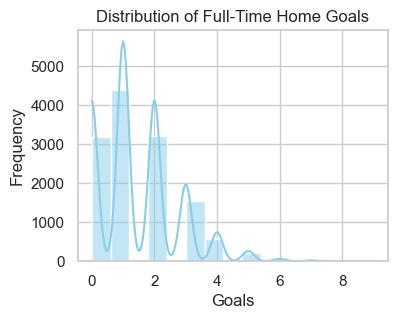

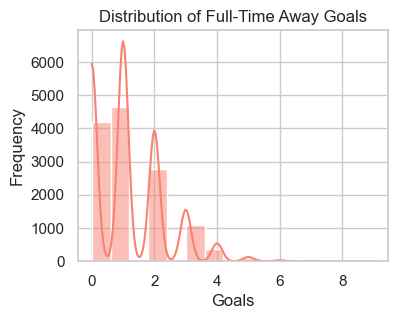

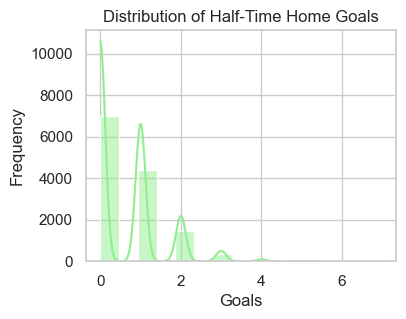

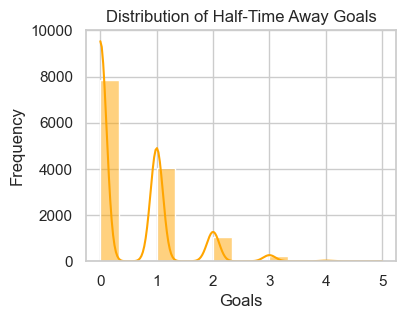

In [26]:
# Full-time Home Goals
sns.histplot(df['FullTimeHomeGoals'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Full-Time Home Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

# Full-time Away Goals
sns.histplot(df['FullTimeAwayGoals'], kde=True, bins=15, color='salmon')
plt.title('Distribution of Full-Time Away Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

# Half-time Home Goals
sns.histplot(df['HalfTimeHomeGoals'], kde=True, bins=15, color='lightgreen')
plt.title('Distribution of Half-Time Home Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

# Half-time Away Goals
sns.histplot(df['HalfTimeAwayGoals'], kde=True, bins=15, color='orange')
plt.title('Distribution of Half-Time Away Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()


Distribution Visualization: Histogram of Betting odds

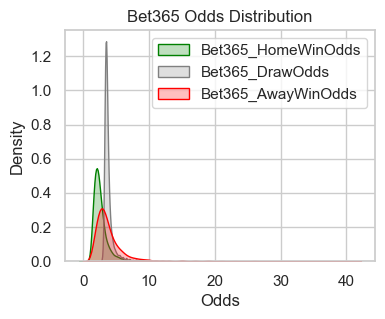

In [27]:
for col, color in zip(['Bet365_HomeWinOdds', 'Bet365_DrawOdds', 'Bet365_AwayWinOdds'],
                      ['green', 'gray', 'red']):
    sns.kdeplot(df[col], fill=True, label=col, color=color)

plt.title('Bet365 Odds Distribution')
plt.xlabel('Odds')
plt.ylabel('Density')
plt.legend()
plt.show()


Distribution Visualization: Bar plot for Count of matches per Division

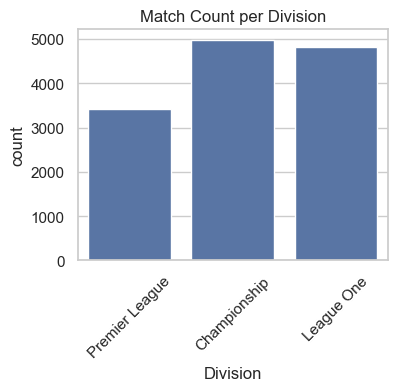

In [28]:
sns.countplot(data=df, x='Division')
plt.title('Match Count per Division')
plt.xticks(rotation=45)
plt.show()

Distribution Visualization: Bar plot for Count of matches by FullTimeResult  

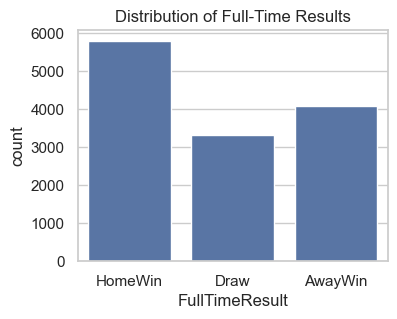

In [29]:
sns.countplot(data=df, x='FullTimeResult', order=['HomeWin', 'Draw', 'AwayWin'])
plt.title('Distribution of Full-Time Results')
plt.show()

Distribution Visualization: Box plot for Goals scored by Division

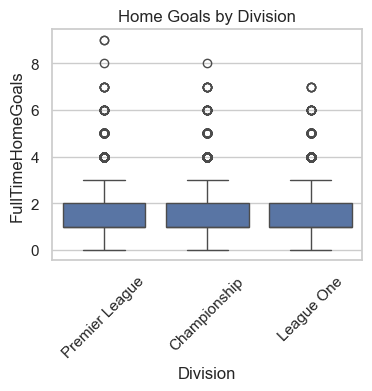

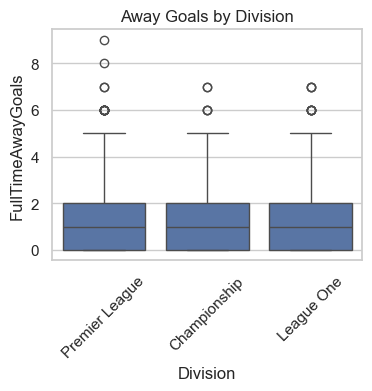

In [30]:
sns.boxplot(data=df, x='Division', y='FullTimeHomeGoals')
plt.title('Home Goals by Division')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df, x='Division', y='FullTimeAwayGoals')
plt.title('Away Goals by Division')
plt.xticks(rotation=45)
plt.show()

Distribution Visualization: Box plot for betting odds by Division

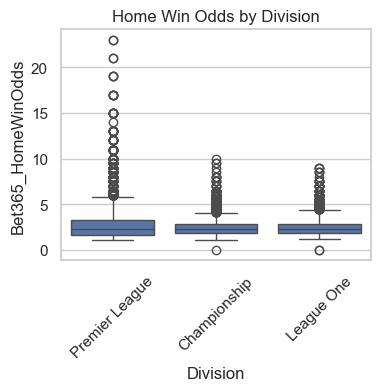

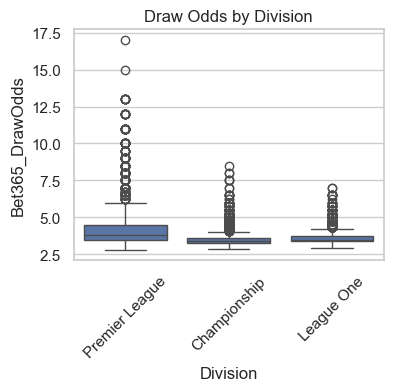

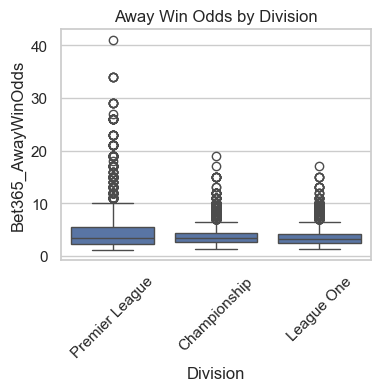

In [31]:
sns.boxplot(data=df, x='Division', y='Bet365_HomeWinOdds')
plt.title('Home Win Odds by Division')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df, x='Division', y='Bet365_DrawOdds')
plt.title('Draw Odds by Division')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df, x='Division', y='Bet365_AwayWinOdds')
plt.title('Away Win Odds by Division')
plt.xticks(rotation=45)
plt.show()

Relationship Visualization: Scatter plot to explore relationship betweenHome goals vs Away goals per match

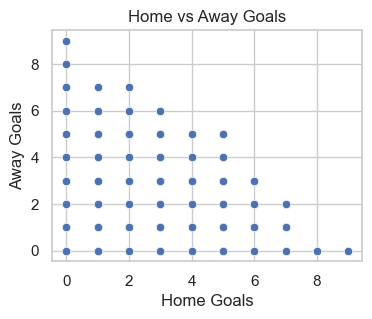

In [32]:
sns.scatterplot(data=df, x='FullTimeHomeGoals', y='FullTimeAwayGoals')
plt.title('Home vs Away Goals')
plt.xlabel('Home Goals')
plt.ylabel('Away Goals')
plt.show()

Relationship Visualization: Scatter plot to explore relationship between Betting odds (e.g., HomeWinOdds) vs actual result (RAW probabilities)

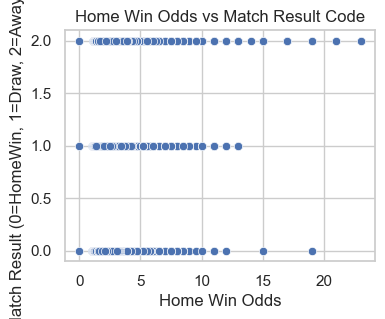

In [33]:
sns.scatterplot(data=df, x='Bet365_HomeWinOdds', y='match_result_code')
plt.title('Home Win Odds vs Match Result Code')
plt.xlabel('Home Win Odds')
plt.ylabel('Match Result (0=HomeWin, 1=Draw, 2=AwayWin)')
plt.show()

Relationship Visualization: Scatter plot to explore relationship between Betting odds (e.g., HomeWinOdds) vs actual result (IMPLIED  probabilities)

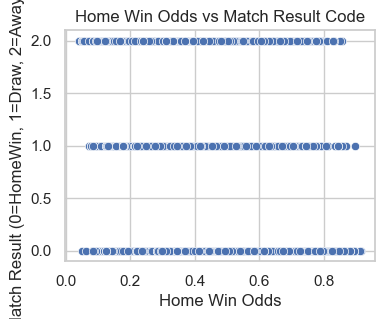

In [34]:
sns.scatterplot(data=df, x='home_prob', y='match_result_code')
plt.title('Home Win Odds vs Match Result Code')
plt.xlabel('Home Win Odds')
plt.ylabel('Match Result (0=HomeWin, 1=Draw, 2=AwayWin)')
plt.show()

Now Lets prepare our machine learning dataset
Step 1: remove columns that leak outcome

In [35]:
df = df.drop(columns=[
    'FullTimeHomeGoals', 'FullTimeAwayGoals', 'FullTimeResult',
    'HalfTimeHomeGoals', 'HalfTimeAwayGoals', 'HalfTimeResult'
])

Encode division,home team and away team into numeric format

In [36]:
from sklearn.preprocessing import LabelEncoder

le_div = LabelEncoder()
df['Division_enc'] = le_div.fit_transform(df['Division'])

le_home = LabelEncoder()
df['HomeTeam_enc'] = le_home.fit_transform(df['HomeTeam'])

le_away = LabelEncoder()
df['AwayTeam_enc'] = le_away.fit_transform(df['AwayTeam'])


Now we are going to create a feature that allows us to view the form of the team based on stats from the 5 previous matches as our model will base on team stats and bookmaker odds

In [37]:
from collections import defaultdict

def generate_team_form_features(df, team_col='HomeTeam', date_col='MatchDate', n_matches=5):
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df = df.sort_values(by=date_col)

    stat_cols = [
        'HomeShots', 'HomeShotsOnTarget', 'HomeFoulsCommitted',
        'HomeYellowCards', 'HomeRedCards', 'match_result_code'
    ]

    # Create structure to store rolling history per team
    team_history = defaultdict(list)

    # New features to collect
    new_features = []

    for idx, row in df.iterrows():
        row_feats = {}

        for role in ['home', 'away']:
            team = row['HomeTeam'] if role == 'home' else row['AwayTeam']
            is_home = role == 'home'

            # Get history of this team
            history = team_history[team][-n_matches:]

            # Build feature names
            prefix = f'{role}_team_last{n_matches}'

            # Compute rolling means if enough history
            if len(history) > 0:
                hist_df = pd.DataFrame(history)

                row_feats[f'{prefix}_avg_shots'] = hist_df['shots'].mean()
                row_feats[f'{prefix}_avg_shots_on_target'] = hist_df['sot'].mean()
                row_feats[f'{prefix}_avg_fouls'] = hist_df['fouls'].mean()
                row_feats[f'{prefix}_avg_yellow_cards'] = hist_df['yellows'].mean()
                row_feats[f'{prefix}_avg_red_cards'] = hist_df['reds'].mean()
                row_feats[f'{prefix}_win_ratio'] = hist_df['win'].mean()
                row_feats[f'{prefix}_win_count'] = hist_df['win'].sum()
                row_feats[f'{prefix}_draw_ratio'] = hist_df['draw'].mean()
                row_feats[f'{prefix}_draw_count'] = hist_df['draw'].sum()
            else:
                # Not enough history: use NaN or zero
                row_feats[f'{prefix}_avg_shots'] = None
                row_feats[f'{prefix}_avg_shots_on_target'] = None
                row_feats[f'{prefix}_avg_fouls'] = None
                row_feats[f'{prefix}_avg_yellow_cards'] = None
                row_feats[f'{prefix}_avg_red_cards'] = None
                row_feats[f'{prefix}_win_ratio'] = None
                row_feats[f'{prefix}_win_count'] = 0
                row_feats[f'{prefix}_draw_count'] = 0
                row_feats[f'{prefix}_draw_ratio'] = None

        new_features.append(row_feats)

        # After processing the row, update the team_history with this match's stats
        for team_key, is_home in zip(['HomeTeam', 'AwayTeam'], [True, False]):
            team = row[team_key]
            stats = {
                'shots': row['HomeShots'] if is_home else row['AwayShots'],
                'sot': row['HomeShotsOnTarget'] if is_home else row['AwayShotsOnTarget'],
                'fouls': row['HomeFoulsCommitted'] if is_home else row['AwayFoulsCommitted'],
                'yellows': row.get('HomeYellowCards', 0.0) if is_home else row.get('AwayYellowCards', 0.0),
                'reds': row.get('HomeRedCards', 0.0) if is_home else row.get('AwayRedCards', 0.0),
                'win': 1 if row['match_result_code'] == (0 if is_home else 2) else 0,  # win = 1, else 0
                'draw': 1 if row['match_result_code'] == 1 else 0
            }
            team_history[team].append(stats)

    # Convert new features into a DataFrame and concatenate
    new_feat_df = pd.DataFrame(new_features)
    df = pd.concat([df.reset_index(drop=True), new_feat_df], axis=1)

    return df


now we call the function

In [38]:
df = generate_team_form_features(df, n_matches=5)

lets see the results 

In [39]:
df.head()

,Division,MatchDate,HomeTeam,AwayTeam,Referee,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeFoulsCommitted,...,home_team_last5_draw_ratio,away_team_last5_avg_shots,away_team_last5_avg_shots_on_target,away_team_last5_avg_fouls,away_team_last5_avg_yellow_cards,away_team_last5_avg_red_cards,away_team_last5_win_ratio,away_team_last5_win_count,away_team_last5_draw_count,away_team_last5_draw_ratio
0,Championship,2016-08-05,Fulham,Newcastle,S Hooper,5.0,8.0,3.0,2.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
1,League One,2016-08-06,Walsall,AFC Wimbledon,C Breakspear,9.0,10.0,4.0,2.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
2,League One,2016-08-06,Swindon,Coventry,D Handley,14.0,10.0,3.0,3.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
3,League One,2016-08-06,Southend,Gillingham,D Whitestone,10.0,18.0,4.0,4.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN
4,League One,2016-08-06,Shrewsbury,Milton Keynes Dons,B Malone,11.0,12.0,3.0,4.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN


Step 3: Machine Learning
 
i am now going to use supervised learning classification type of machine learning to try and predict the match result which is the value in match result code 

first lets import everything we need 

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

Now we select the features and target

In [41]:
# Define feature columns (numeric features only)
feature_cols = [
    'Bet365_HomeWinOdds', 'Bet365_DrawOdds', 'Bet365_AwayWinOdds',
    'home_team_last5_avg_shots', 'home_team_last5_avg_shots_on_target',
    'home_team_last5_avg_fouls', 'home_team_last5_avg_yellow_cards',
    'home_team_last5_avg_red_cards', 'home_team_last5_win_ratio',
    'home_team_last5_draw_ratio',
    'away_team_last5_avg_shots', 'away_team_last5_avg_shots_on_target',
    'away_team_last5_avg_fouls', 'away_team_last5_avg_yellow_cards',
    'away_team_last5_avg_red_cards', 'away_team_last5_win_ratio',
    'away_team_last5_draw_ratio'
]

# Define features and target
X = df[feature_cols]
y = df['match_result_code']


Now we split the training and test datasets

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Now we train a random forest classifier

In [43]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Now we evaluate our model

Classification Report:
              precision    recall  f1-score   support

     HomeWin       0.52      0.75      0.62      1157
        Draw       0.27      0.07      0.12       665
     AwayWin       0.47      0.46      0.46       819

    accuracy                           0.49      2641
   macro avg       0.42      0.43      0.40      2641
weighted avg       0.44      0.49      0.44      2641



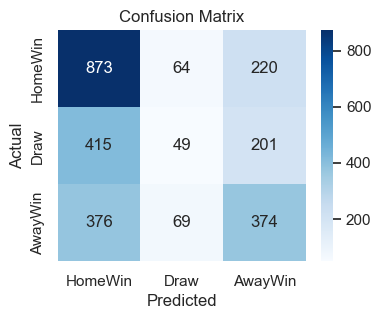

In [44]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['HomeWin', 'Draw', 'AwayWin']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['HomeWin', 'Draw', 'AwayWin'],
            yticklabels=['HomeWin', 'Draw', 'AwayWin'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Our model is not very accurate so what i will do is to make class weights balanced

In [45]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

now we test the new model

Classification Report:
              precision    recall  f1-score   support

     HomeWin       0.52      0.77      0.62      1157
        Draw       0.26      0.05      0.09       665
     AwayWin       0.47      0.46      0.46       819

    accuracy                           0.49      2641
   macro avg       0.42      0.43      0.39      2641
weighted avg       0.44      0.49      0.44      2641



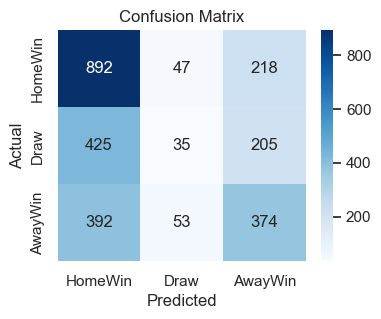

In [46]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['HomeWin', 'Draw', 'AwayWin']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['HomeWin', 'Draw', 'AwayWin'],
            yticklabels=['HomeWin', 'Draw', 'AwayWin'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


From this result the weighted model does worse than the one which is not. to try and improve performance i am going to add a way to identify team strength as well

In [47]:
def generate_team_strength_features(df, team_col_home='HomeTeam', team_col_away='AwayTeam', date_col='MatchDate', n_matches=18):
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df = df.sort_values(by=date_col)

    # Store match results per team: list of dicts with win/draw info
    team_history = defaultdict(list)

    home_strengths = []
    away_strengths = []

    for idx, row in df.iterrows():
        # For home team
        home_team = row[team_col_home]
        home_hist = team_history[home_team][-n_matches:]

        if len(home_hist) == n_matches:
            hist_df = pd.DataFrame(home_hist)
            win_ratio = hist_df['win'].mean()
            draw_ratio = hist_df['draw'].mean()
            score = win_ratio * 3 + draw_ratio * 1

            # Map score to category (1 to 5) based on ranges similar to FPL FDR rankings
            if score >= 2.2:
                home_strength = 5
            elif score >= 1.8:
                home_strength = 4
            elif score >= 1.4:
                home_strength = 3
            elif score >= 1.0:
                home_strength = 2
            else:
                home_strength = 1
        else:
            home_strength = None  # Not enough data

        home_strengths.append(home_strength)

        # For away team
        away_team = row[team_col_away]
        away_hist = team_history[away_team][-n_matches:]

        if len(away_hist) == n_matches:
            hist_df = pd.DataFrame(away_hist)
            win_ratio = hist_df['win'].mean()
            draw_ratio = hist_df['draw'].mean()
            score = win_ratio * 3 + draw_ratio * 1

            if score >= 2.2:
                away_strength = 5
            elif score >= 1.8:
                away_strength = 4
            elif score >= 1.4:
                away_strength = 3
            elif score >= 1.0:
                away_strength = 2
            else:
                away_strength = 1
        else:
            away_strength = None

        away_strengths.append(away_strength)

        # Update history after calculating strength for this match
        for team_key, is_home in [(team_col_home, True), (team_col_away, False)]:
            team = row[team_key]
            win_code = 0 if is_home else 2
            stats = {
                'win': 1 if row['match_result_code'] == win_code else 0,
                'draw': 1 if row['match_result_code'] == 1 else 0
            }
            team_history[team].append(stats)

    df['home_team_strength_cat'] = home_strengths
    df['away_team_strength_cat'] = away_strengths

    return df


run the function

In [48]:
df = generate_team_strength_features(df)


In [49]:
df.head()

,Division,MatchDate,HomeTeam,AwayTeam,Referee,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeFoulsCommitted,...,away_team_last5_avg_shots_on_target,away_team_last5_avg_fouls,away_team_last5_avg_yellow_cards,away_team_last5_avg_red_cards,away_team_last5_win_ratio,away_team_last5_win_count,away_team_last5_draw_count,away_team_last5_draw_ratio,home_team_strength_cat,away_team_strength_cat
0,Championship,2016-08-05,Fulham,Newcastle,S Hooper,5.0,8.0,3.0,2.0,12.0,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
21,Championship,2016-08-06,Birmingham,Cardiff,T Robinson,14.0,13.0,3.0,5.0,12.0,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
20,Championship,2016-08-06,Rotherham,Wolves,S Duncan,6.0,9.0,3.0,5.0,11.0,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
19,Championship,2016-08-06,Reading,Preston,A Davies,15.0,7.0,5.0,3.0,13.0,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
17,Championship,2016-08-06,Huddersfield,Brentford,G Eltringham,16.0,8.0,7.0,4.0,13.0,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN


Now i will select the new features to include the new strength ones

In [50]:
# Define feature columns (numeric features only)
feature_cols = [
    'Bet365_HomeWinOdds', 'Bet365_DrawOdds', 'Bet365_AwayWinOdds',
    'home_team_last5_avg_shots', 'home_team_last5_avg_shots_on_target',
    'home_team_last5_avg_fouls', 'home_team_last5_avg_yellow_cards',
    'home_team_last5_avg_red_cards', 'home_team_last5_win_ratio',
    'home_team_last5_draw_ratio',
    'away_team_last5_avg_shots', 'away_team_last5_avg_shots_on_target',
    'away_team_last5_avg_fouls', 'away_team_last5_avg_yellow_cards',
    'away_team_last5_avg_red_cards', 'away_team_last5_win_ratio',
    'away_team_last5_draw_ratio' , 'home_team_strength_cat' ,	'away_team_strength_cat'
]

# Define features and target
X = df[feature_cols]
y = df['match_result_code']


Split the data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


train the model

In [52]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

evaluate the new model

Classification Report:
              precision    recall  f1-score   support

     HomeWin       0.53      0.75      0.62      1157
        Draw       0.31      0.07      0.12       665
     AwayWin       0.48      0.50      0.49       819

    accuracy                           0.50      2641
   macro avg       0.44      0.44      0.41      2641
weighted avg       0.46      0.50      0.45      2641



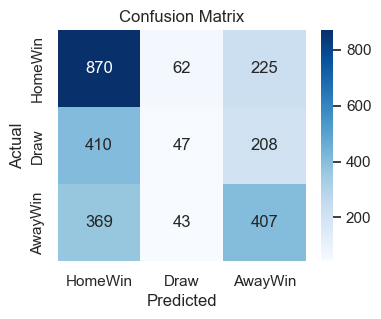

In [53]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['HomeWin', 'Draw', 'AwayWin']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['HomeWin', 'Draw', 'AwayWin'],
            yticklabels=['HomeWin', 'Draw', 'AwayWin'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Export Machine learning dataset

In [54]:
df.to_csv('machine_learning_data.csv', index=False)